In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [70]:
df=pd.read_csv("/home/mikediaz/DSclass/hw/MooresLaw/moore.csv", delimiter='\t', header=None)

In [72]:
def clean_nums(x):
    if x.find('[')>-1:
        x=x.split('[')[0]
    for i in x: 
        if (not i.isnumeric()): 
            x=x.replace(i,'')
    return float(x)


transistors=df[1].apply(lambda x: clean_nums(x))
year=df[2].apply(lambda x: clean_nums(x))

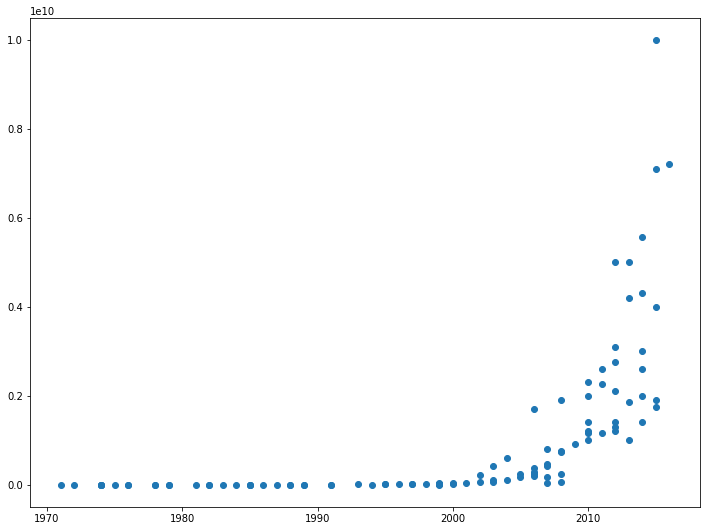

In [83]:
plt.figure(figsize = (12,9) )
plt.scatter(year,transistors);

In [75]:
log_t=np.log2(transistors)

d = np.mean(year**2) - np.mean(year)**2

w0 = (np.mean(log_t)*np.mean(year**2) - np.mean(year)*np.mean(year*log_t)) / d
w1 = (np.mean(year*log_t) - np.mean(year)*np.mean(log_t)) / d

log_t_hat = w0 + w1*year

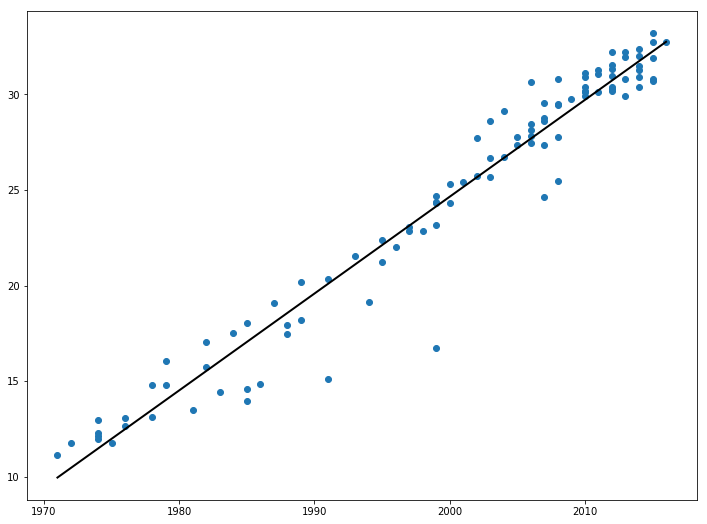

In [82]:
plt.figure(figsize = (12,9) )
plt.scatter(year,log_t)
plt.plot(year, log_t_hat, color = "black", linewidth = 2);

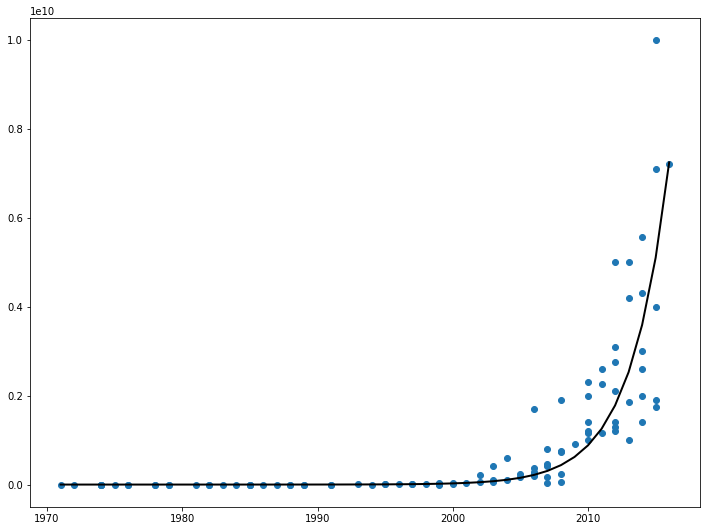

In [84]:
plt.figure(figsize = (12,9) )
plt.scatter(year,transistors)
plt.plot(year, 2**log_t_hat, color = "black", linewidth = 2);

In [81]:
r2 = 1 - np.sum((log_t - log_t_hat)**2)/np.sum((log_t - log_t.mean())**2)

print("R-squared: {}".format(r2))

R-squared: 0.9529442852285763
